In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from importlib import reload
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *
from evaluation import *
from sklearn.cluster import DBSCAN
from pca import *

In [2]:
df = load_data()

# StockID RFM model analysis

## 1.  Categorical level RFM with Kmeans++

Clusters = 2 ,Silhouette Score = 0.23157
Clusters = 3 ,Silhouette Score = 0.20039
Clusters = 4 ,Silhouette Score = 0.19882
Clusters = 5 ,Silhouette Score = 0.19936
Clusters = 6 ,Silhouette Score = 0.19622
Clusters = 7 ,Silhouette Score = 0.1917
Clusters = 8 ,Silhouette Score = 0.18413
Clusters = 9 ,Silhouette Score = 0.17821
Clusters = 10 ,Silhouette Score = 0.15675
Clusters = 11 ,Silhouette Score = 0.15809
Clusters = 12 ,Silhouette Score = 0.16097
Clusters = 13 ,Silhouette Score = 0.163
Clusters = 14 ,Silhouette Score = 0.16338


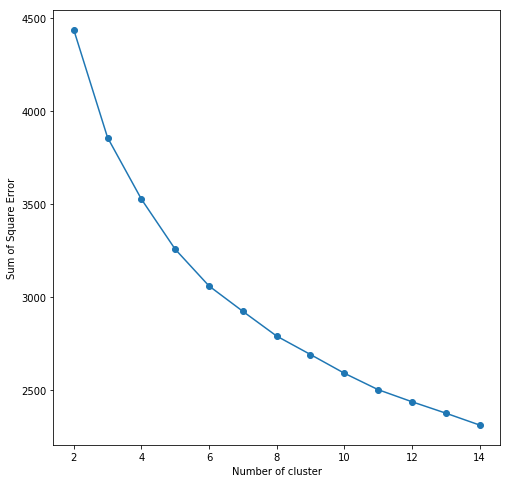

In [3]:
stock_rfm = rfm(df,model_type='StockID')
stock_rfm_trans = rfm_transform(stock_rfm)
matrix_trans = rfm_matrix(stock_rfm_trans, model_type=1)
sse, sscore, test_range = kmeans(matrix_trans)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


0.5750952144658974
0.21142607856376427
0.1707431957209957
0.12369589418592987
0.005632477967471906
0.017407214181035843
0.03387710960821588
0.04453096150202342
0.09735310850696512
0.06273212433361261
0.07395116394203587
0.08502411334168411
0.08288178013134671
[0.36298486 0.13344654]


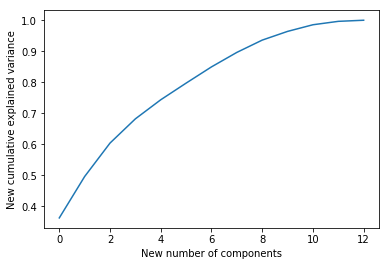

In [4]:
pca_test(stock_rfm_trans)

In [5]:
clusters_trans = kmeans(matrix = matrix_trans, cluster_num = 5)
temp = stock_rfm.copy()
temp = rfm_write_back(temp,clusters_trans) 
temp.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,Cluster
0,17850,34,372,5391.21,118.80,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0,3
1,13047,9,56,3232.59,21.00,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0,4
2,12583,15,2,6705.38,68.00,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0,1
3,13748,5,95,948.25,0.00,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0,4
4,15100,3,333,876.00,0.00,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,3
5,15291,14,25,4623.30,0.00,3392.06,0.00,347.50,0.0,0.0,13.00,870.74,0.0,2
6,14688,21,7,5579.10,0.82,4739.28,0.00,220.00,0.0,0.0,179.18,439.82,0.0,1
7,17809,12,16,5411.91,3.15,4698.36,0.00,270.00,0.0,0.0,0.00,440.40,0.0,1
8,15311,91,0,60632.75,1138.20,45359.89,576.27,1911.58,0.0,0.0,2313.24,9333.57,0.0,3
9,16098,7,87,2005.63,16.15,1944.96,0.00,0.00,0.0,0.0,0.00,44.52,0.0,4


## 2. Normalized continuous data RFM with Kmeans

Clusters = 2 ,Silhouette Score = 0.70319
Clusters = 3 ,Silhouette Score = 0.61544
Clusters = 4 ,Silhouette Score = 0.51149
Clusters = 5 ,Silhouette Score = 0.53187
Clusters = 6 ,Silhouette Score = 0.51576
Clusters = 7 ,Silhouette Score = 0.48359
Clusters = 8 ,Silhouette Score = 0.47565
Clusters = 9 ,Silhouette Score = 0.48983
Clusters = 10 ,Silhouette Score = 0.4915
Clusters = 11 ,Silhouette Score = 0.48028
Clusters = 12 ,Silhouette Score = 0.41528
Clusters = 13 ,Silhouette Score = 0.39831
Clusters = 14 ,Silhouette Score = 0.4346


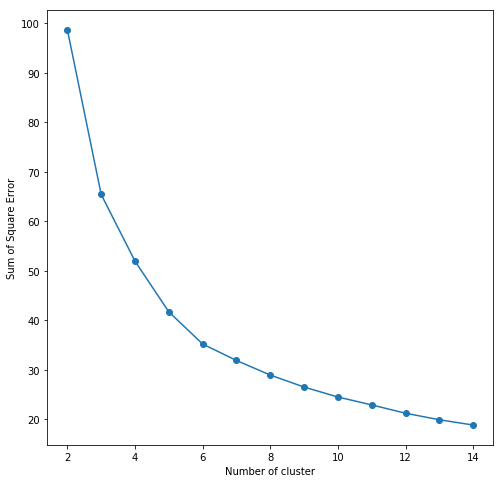

In [6]:
stock_rfm_norm = norm(stock_rfm.iloc[:,1:])
matrix_norm = rfm_matrix(stock_rfm_norm, model_type=1)
sse, sscore, test_range = kmeans(matrix_norm)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

0.07220429071147952
0.004744424066770608
0.0015014660877267995
0.0008903096926614631
0.0006510513497152401
0.0006129626934786836
0.0005760108927095996
0.00015876990823382938
0.0004352509982310218
0.0003254970622282918
0.00024477257637564104
2.0623533431623677e-19
[0.87685301 0.05761656]


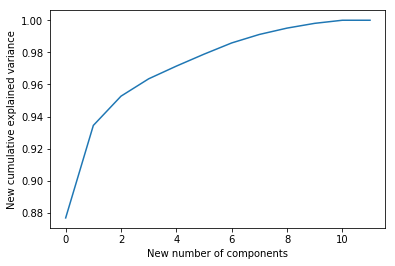

In [7]:
pca_test(stock_rfm_norm)

In [8]:
clusters_norm = kmeans(matrix = matrix_norm, cluster_num = 5)
temp = stock_rfm.copy()
temp = rfm_write_back(temp,clusters_norm) 
temp.head(10)

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9,Cluster
0,17850,34,372,5391.21,118.80,2370.11,101.76,0.00,0.0,0.0,413.58,2386.96,0.0,4
1,13047,9,56,3232.59,21.00,2623.36,0.00,239.55,0.0,0.0,0.00,348.68,0.0,3
2,12583,15,2,6705.38,68.00,6561.54,60.84,0.00,0.0,0.0,0.00,15.00,0.0,2
3,13748,5,95,948.25,0.00,933.25,0.00,0.00,0.0,0.0,0.00,15.00,0.0,3
4,15100,3,333,876.00,0.00,876.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,4
5,15291,14,25,4623.30,0.00,3392.06,0.00,347.50,0.0,0.0,13.00,870.74,0.0,2
6,14688,21,7,5579.10,0.82,4739.28,0.00,220.00,0.0,0.0,179.18,439.82,0.0,2
7,17809,12,16,5411.91,3.15,4698.36,0.00,270.00,0.0,0.0,0.00,440.40,0.0,2
8,15311,91,0,60632.75,1138.20,45359.89,576.27,1911.58,0.0,0.0,2313.24,9333.57,0.0,0
9,16098,7,87,2005.63,16.15,1944.96,0.00,0.00,0.0,0.0,0.00,44.52,0.0,3


## 3. Categorical level RFM with DBSCAN

In [24]:
X_trans = stock_rfm_trans.iloc[:,1:]

In [25]:
db = DBSCAN(eps= 0.2, min_samples=20).fit(X_trans)
labels_trans = db.labels_
n_clusters_trans = len(set(labels_trans)) - (1 if -1 in labels_trans else 0)
print(n_clusters_trans)
X_trans['DBcluster'] = labels_trans
X_trans.groupby("DBcluster", as_index = False).count()

1


,DBcluster,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9
0,-1,4302,4302,4302,4302,4302,4302,4302,4302,4302,4302,4302,4302
1,0,20,20,20,20,20,20,20,20,20,20,20,20


## 4. Normalized continuous data RFM with DBSCAN

In [45]:
X_norm = norm(stock_rfm.iloc[:,1:])

In [46]:
db = DBSCAN(eps=0.02, min_samples=20).fit(X_norm)
labels_norm = db.labels_
n_clusters_norm = len(set(labels_norm)) - (1 if -1 in labels_norm else 0)
print(n_clusters_norm)
X_norm['DBcluster'] = labels_norm
X_norm.groupby("DBcluster", as_index = False).count()

3


,DBcluster,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,cate_8,cate_9
0,-1,700,700,700,700,700,700,700,700,700,700,700,700
1,0,3500,3500,3500,3500,3500,3500,3500,3500,3500,3500,3500,3500
2,1,107,107,107,107,107,107,107,107,107,107,107,107
3,2,15,15,15,15,15,15,15,15,15,15,15,15


## 5. Compute the score with results of the clusters above

In [ ]:
result = get_score(matrix_trans,clusters_trans,'Categorical  StockID RFM Kmeans++')
result = get_score(matrix_norm,clusters_norm,'Norm StockID RFM Kmeans++',result,flag=1)
matrix_trans = X_trans.values
result = get_score(matrix_trans,labels_trans,'Categorical StockID RFM DBSCAN',result,flag=1)
matrix_norm = X_norm.values
result = get_score(matrix_norm,labels_norm,'Norm StockID RFM DBSCAN',result,flag=1)
print(result)

## 6. Identify Segementation 

In [8]:
n_attributes = len(stock_rfm.columns) - 5
customer_clustering = df_for_chart(stock_rfm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_6 std,cate_7,cate_7 mean,cate_7 std,cate_8,cate_8 mean,cate_8 std,cate_9,cate_9 mean,cate_9 std
Cluster,,,,,,,,,,,,,,,,,,,,,
3,1225.0,2.0,623,2,1.0,168.000000,3.303371,1.165077,95.265306,1.873194,...,0.667783,136.000000,2.674157,1.241894,115.510204,2.271268,0.987202,179.755102,3.534510,1.419316
4,2864.0,3.0,858,3,1.0,51.326816,1.713287,1.136114,104.050279,3.473193,...,0.903804,50.663408,1.691142,1.134926,81.634078,2.724942,1.286059,87.011173,2.904429,1.395198
1,2236.0,4.0,574,4,1.0,84.078712,3.275261,1.549704,98.568873,3.839721,...,0.678038,96.377460,3.754355,1.135708,100.670841,3.921603,1.013388,57.737030,2.249129,1.294167
2,4706.0,5.0,1047,5,1.0,78.623034,3.533906,1.481031,99.213770,4.459408,...,0.696149,82.426689,3.704871,1.437592,97.407565,4.378223,0.795296,51.232469,2.302770,1.168278
0,1937.0,1.0,1220,2,1.0,199.277233,3.163934,0.976449,100.567888,1.596721,...,0.694150,197.057305,3.128689,1.020606,122.870418,1.950820,0.971330,236.035106,3.747541,1.155260


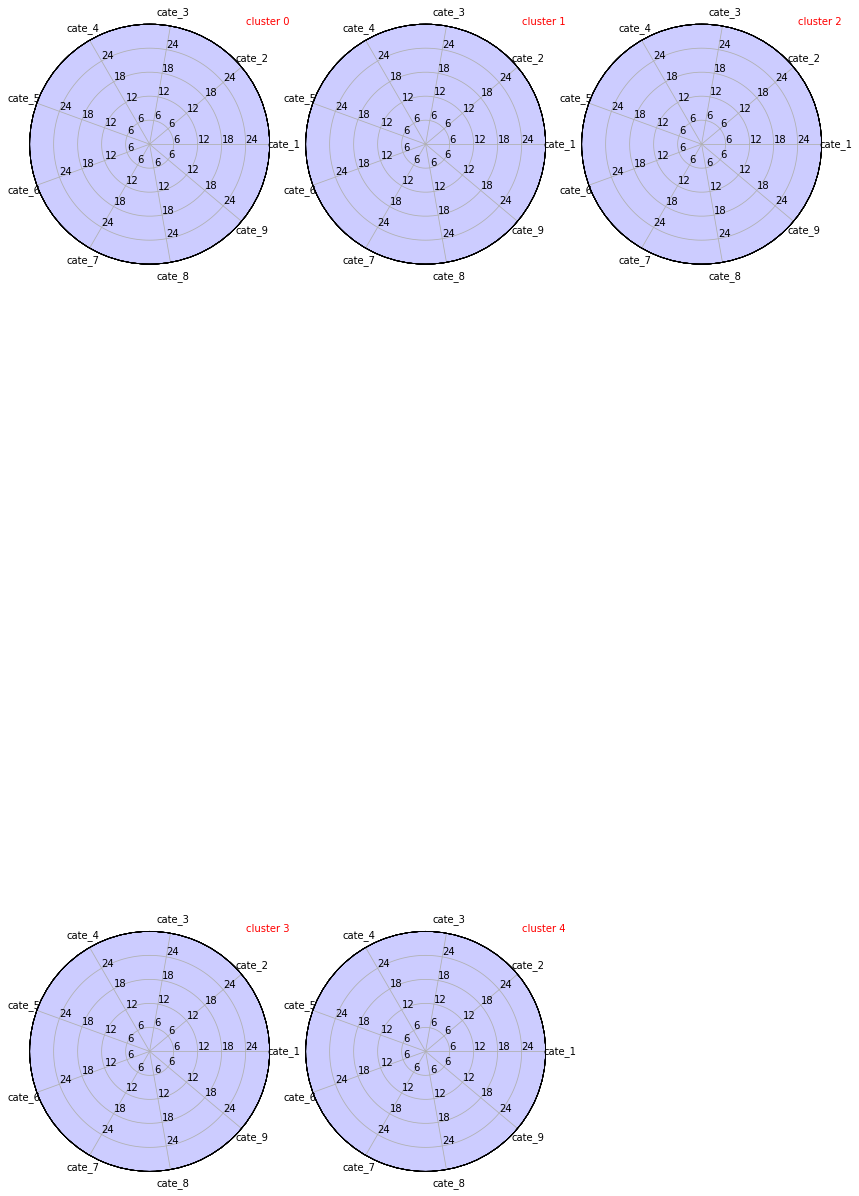

In [9]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

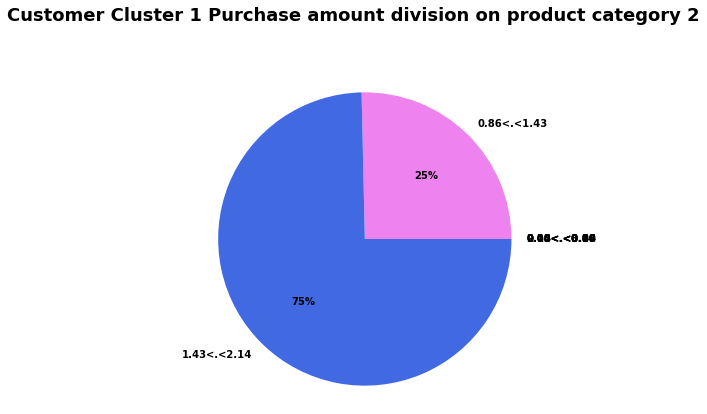

In [10]:
pie_chart(stock_rfm, 1, 2)